# Modelos de Machine Learning para el análisis del paisaje mediante segmentación semántica de imágenes

In [1]:
from google.colab import drive
import os
drive.mount('/content/drive')

os.chdir('/content/drive/My Drive/Estancia verano 2024/Codigo/') #google colab
#os.chdir('/Users/vmac/trabajos/dengue_2024/estancia_2024/codigo/') #local
!pwd

Mounted at /content/drive
/content/drive/My Drive/Estancia verano 2024/Codigo


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder

%matplotlib inline

## Crea el conjunto de datos

In [5]:
def get_data (dir_data, prefijo):
    data = pd.DataFrame()
    for file in os.listdir(dir_data):
        temp = pd.read_csv(os.path.join(dir_data,file))
        tt = [file[len(prefijo):].split('.')[0]]*temp.shape[0]
        temp['img_file'] = tt
        data = pd.concat([data,temp],ignore_index=True)

    cat = 'categoria'
    covariables = list(data.columns[2:data.shape[1]-1])
    imagen = data['img_file']

    # codificamos la variable de respuesta
    ynames = ['Arboles', 'Suelo Desnudo', 'Pavimento', 'Cuerpo de Agua', 'Techo de Lamina', 'Techo de Loza', 'Sin etiqueta']
    le = LabelEncoder()
    le.fit(ynames)
    y_labels = list(le.classes_)
    y = data[cat].astype('int')
    y_cat = le.inverse_transform(y)

    # covariables
    X = data[covariables]

    return data, X, y, y_cat, le, imagen


In [47]:
label_encoder.classes_

array(['Arboles', 'Cuerpo de Agua', 'Pavimento', 'Sin etiqueta',
       'Suelo Desnudo', 'Techo de Lamina', 'Techo de Loza'], dtype='<U15')

In [44]:
# obtenemos los datos...
# la ruta de la carpeta de los csv de las imágenes
dir_data = '../Datos'
#dir_data = './imgs_csvs'
# el prefijo usado para el nombre de los archivos (incluyendo el _)
prefijo = 'Etiquetado_'
data, X, y, y_cat, label_encoder, imagen = get_data(dir_data, prefijo)
data

,categoria,indice,media_r,media_g,media_b,std_r,std_g,std_b,mean_gb,std_mg,...,asm_dist2_ang3,asm_dist3_ang0,asm_dist3_ang1,asm_dist3_ang2,asm_dist3_ang3,asm_dist4_ang0,asm_dist4_ang1,asm_dist4_ang2,asm_dist4_ang3,img_file
0,0.0,1012.0,78.064103,103.195971,17.155678,14.343813,13.538984,9.317533,419.798523,241.206635,...,0.001308,0.001204,0.001250,0.001174,0.001537,0.001537,0.001309,0.001257,0.001309,image_x5_0
1,0.0,1032.0,82.904516,108.150968,12.585806,17.945399,18.447741,12.136006,592.665833,337.380524,...,0.000893,0.000915,0.000908,0.000893,0.001059,0.001059,0.000934,0.000975,0.001047,image_x5_0
2,0.0,1048.0,76.569343,94.113139,21.080292,21.036047,22.530878,15.431297,717.813843,430.810730,...,0.001791,0.001778,0.001823,0.001859,0.001864,0.001864,0.001981,0.002095,0.002422,image_x5_0
3,0.0,1077.0,72.790454,89.236321,20.778813,24.752895,28.789773,17.080784,820.473816,501.056580,...,0.000760,0.000728,0.000718,0.000716,0.000755,0.000755,0.000701,0.000715,0.000744,image_x5_0
4,0.0,1068.0,51.374694,72.315918,16.586122,21.779995,27.672409,12.662758,686.795898,393.504730,...,0.000621,0.000557,0.000543,0.000571,0.000743,0.000743,0.000587,0.000600,0.000592,image_x5_0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201994,1.0,44.0,84.272822,106.546680,39.350622,21.736284,22.717617,17.857884,699.234436,417.467224,...,0.000640,0.000616,0.000598,0.000588,0.000757,0.000757,0.000630,0.000625,0.000656,image_x5_9907
201995,1.0,66.0,30.038781,28.121884,35.675900,2.767769,2.565830,3.573944,77.252075,45.176971,...,0.014673,0.013508,0.013456,0.013366,0.017948,0.017948,0.014117,0.012777,0.012025,image_x5_9907
201996,1.0,103.0,61.455556,64.741667,48.025000,23.604336,40.608462,16.219568,731.761108,791.668701,...,0.003514,0.003167,0.002860,0.002792,0.003866,0.003866,0.003114,0.003011,0.003178,image_x5_9907
201997,1.0,606.0,97.277303,96.321937,81.969611,21.475290,25.343225,17.546601,543.740723,416.029968,...,0.000675,0.000659,0.000617,0.000641,0.000916,0.000916,0.000734,0.000672,0.000673,image_x5_9907


In [45]:
cc = np.where(y_cat=='Cuerpo de Agua')
list(np.unique(data.iloc[cc]['img_file']))

['image_x5_0',
 'image_x5_10',
 'image_x5_10000',
 'image_x5_10001',
 'image_x5_10002',
 'image_x5_10003',
 'image_x5_10004',
 'image_x5_10005',
 'image_x5_10006',
 'image_x5_10007',
 'image_x5_10008',
 'image_x5_10009',
 'image_x5_10011',
 'image_x5_10012',
 'image_x5_10013',
 'image_x5_10014',
 'image_x5_10015',
 'image_x5_10016',
 'image_x5_10017',
 'image_x5_10018',
 'image_x5_10019',
 'image_x5_10020',
 'image_x5_10021',
 'image_x5_10022',
 'image_x5_10023',
 'image_x5_10024',
 'image_x5_10025',
 'image_x5_10026',
 'image_x5_10027',
 'image_x5_10028',
 'image_x5_10029',
 'image_x5_10030',
 'image_x5_10031',
 'image_x5_10032',
 'image_x5_10033',
 'image_x5_10034',
 'image_x5_10035',
 'image_x5_10036',
 'image_x5_10037',
 'image_x5_10038',
 'image_x5_10039',
 'image_x5_10040',
 'image_x5_10041',
 'image_x5_10042',
 'image_x5_10043',
 'image_x5_10044',
 'image_x5_10045',
 'image_x5_10046',
 'image_x5_10047',
 'image_x5_10049',
 'image_x5_10050',
 'image_x5_10051',
 'image_x5_10052',


In [46]:
data.iloc[cc]

,categoria,indice,media_r,media_g,media_b,std_r,std_g,std_b,mean_gb,std_mg,...,asm_dist2_ang3,asm_dist3_ang0,asm_dist3_ang1,asm_dist3_ang2,asm_dist3_ang3,asm_dist4_ang0,asm_dist4_ang1,asm_dist4_ang2,asm_dist4_ang3,img_file
1026,1.0,24.0,0.000000,139.000000,69.000000,0.000000,0.000000,0.000000,103.535240,64.957077,...,0.008124,0.007194,0.007087,0.007012,0.008785,0.008785,0.007546,0.007198,0.007580,image_x5_0
1027,1.0,25.0,0.000000,139.000000,69.000000,0.000000,0.000000,0.000000,471.519897,649.118591,...,0.002399,0.002115,0.002007,0.001873,0.002765,0.002765,0.002266,0.002182,0.002260,image_x5_0
1028,1.0,25.0,255.000000,153.000000,18.000000,0.000000,0.000000,0.000000,471.519897,649.118591,...,0.002399,0.002115,0.002007,0.001873,0.002765,0.002765,0.002266,0.002182,0.002260,image_x5_0
1029,1.0,64.0,0.000000,139.000000,69.000000,0.000000,0.000000,0.000000,193.750748,164.440796,...,0.004848,0.004081,0.003784,0.003729,0.005199,0.005199,0.004075,0.003781,0.003863,image_x5_0
1030,1.0,64.0,255.000000,153.000000,18.000000,0.000000,0.000000,0.000000,193.750748,164.440796,...,0.004848,0.004081,0.003784,0.003729,0.005199,0.005199,0.004075,0.003781,0.003863,image_x5_0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201994,1.0,44.0,84.272822,106.546680,39.350622,21.736284,22.717617,17.857884,699.234436,417.467224,...,0.000640,0.000616,0.000598,0.000588,0.000757,0.000757,0.000630,0.000625,0.000656,image_x5_9907
201995,1.0,66.0,30.038781,28.121884,35.675900,2.767769,2.565830,3.573944,77.252075,45.176971,...,0.014673,0.013508,0.013456,0.013366,0.017948,0.017948,0.014117,0.012777,0.012025,image_x5_9907
201996,1.0,103.0,61.455556,64.741667,48.025000,23.604336,40.608462,16.219568,731.761108,791.668701,...,0.003514,0.003167,0.002860,0.002792,0.003866,0.003866,0.003114,0.003011,0.003178,image_x5_9907
201997,1.0,606.0,97.277303,96.321937,81.969611,21.475290,25.343225,17.546601,543.740723,416.029968,...,0.000675,0.000659,0.000617,0.000641,0.000916,0.000916,0.000734,0.000672,0.000673,image_x5_9907


In [37]:
label_encoder.inverse_transform(data.iloc[cc]['categoria'].astype('int'))

array(['Cuerpo de Agua', 'Cuerpo de Agua', 'Cuerpo de Agua',
       'Cuerpo de Agua', 'Cuerpo de Agua', 'Cuerpo de Agua',
       'Cuerpo de Agua', 'Cuerpo de Agua', 'Cuerpo de Agua',
       'Cuerpo de Agua', 'Cuerpo de Agua', 'Cuerpo de Agua',
       'Cuerpo de Agua', 'Cuerpo de Agua', 'Cuerpo de Agua',
       'Cuerpo de Agua', 'Cuerpo de Agua', 'Cuerpo de Agua',
       'Cuerpo de Agua', 'Cuerpo de Agua', 'Cuerpo de Agua',
       'Cuerpo de Agua', 'Cuerpo de Agua', 'Cuerpo de Agua',
       'Cuerpo de Agua', 'Cuerpo de Agua', 'Cuerpo de Agua',
       'Cuerpo de Agua', 'Cuerpo de Agua', 'Cuerpo de Agua',
       'Cuerpo de Agua', 'Cuerpo de Agua', 'Cuerpo de Agua',
       'Cuerpo de Agua', 'Cuerpo de Agua', 'Cuerpo de Agua',
       'Cuerpo de Agua', 'Cuerpo de Agua', 'Cuerpo de Agua',
       'Cuerpo de Agua', 'Cuerpo de Agua', 'Cuerpo de Agua',
       'Cuerpo de Agua', 'Cuerpo de Agua', 'Cuerpo de Agua',
       'Cuerpo de Agua', 'Cuerpo de Agua', 'Cuerpo de Agua',
       'Cuerpo de Agua',

<Axes: xlabel='categoria'>

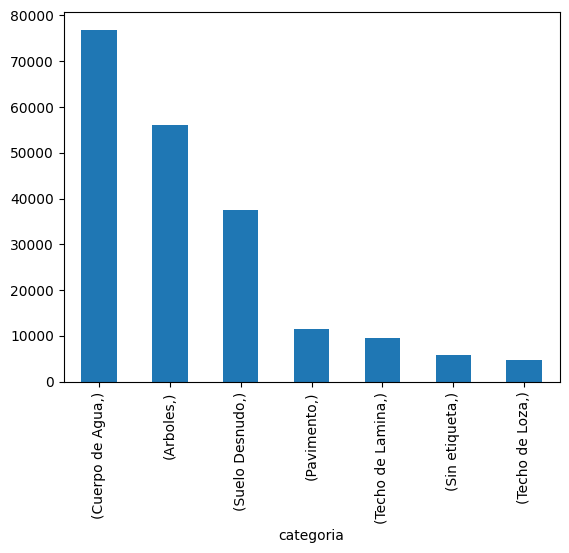

In [7]:
aa = pd.DataFrame(y_cat)
aa.columns = ['categoria']
aa.value_counts().plot(kind='bar')

## Métodos básicos de visualización y reducción de dimensión

Observa que las covariables NO están estandarizadas. Eso puede generar problemas en la modelación, ya que existen diferentes unidades y escalas

In [8]:
X

,media_r,media_g,media_b,std_r,std_g,std_b,mean_gb,std_mg,density,dissimilarity_dist0_ang0,...,asm_dist2_ang2,asm_dist2_ang3,asm_dist3_ang0,asm_dist3_ang1,asm_dist3_ang2,asm_dist3_ang3,asm_dist4_ang0,asm_dist4_ang1,asm_dist4_ang2,asm_dist4_ang3
0,147.103118,143.263789,98.448441,7.399619,5.095487,5.424684,176.127106,96.417191,0.0012,1.940000,...,0.006636,0.004655,0.004100,0.004050,0.003969,0.005923,0.005923,0.004546,0.004285,0.004361
1,0.000000,139.000000,69.000000,0.000000,0.000000,0.000000,176.127106,96.417191,0.0012,1.940000,...,0.006636,0.004655,0.004100,0.004050,0.003969,0.005923,0.005923,0.004546,0.004285,0.004361
2,0.000000,139.000000,69.000000,0.000000,0.000000,0.000000,176.127106,96.417191,0.0012,1.940000,...,0.006636,0.004655,0.004100,0.004050,0.003969,0.005923,0.005923,0.004546,0.004285,0.004361
3,72.077994,116.880223,77.172702,19.175470,20.464376,20.776922,614.635071,329.958008,0.2340,6.584936,...,0.001414,0.001244,0.001225,0.001180,0.001223,0.001272,0.001272,0.001254,0.001277,0.001396
4,0.000000,139.000000,69.000000,0.000000,0.000000,0.000000,614.635071,329.958008,0.2340,6.584936,...,0.001414,0.001244,0.001225,0.001180,0.001223,0.001272,0.001272,0.001254,0.001277,0.001396
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202043,84.272822,106.546680,39.350622,21.736284,22.717617,17.857884,699.234436,417.467224,0.2158,6.850871,...,0.000824,0.000640,0.000616,0.000598,0.000588,0.000757,0.000757,0.000630,0.000625,0.000656
202044,30.038781,28.121884,35.675900,2.767769,2.565830,3.573944,77.252075,45.176971,0.0014,2.449675,...,0.019264,0.014673,0.013508,0.013456,0.013366,0.017948,0.017948,0.014117,0.012777,0.012025
202045,61.455556,64.741667,48.025000,23.604336,40.608462,16.219568,731.761108,791.668701,0.1139,8.828231,...,0.004559,0.003514,0.003167,0.002860,0.002792,0.003866,0.003866,0.003114,0.003011,0.003178
202046,97.277303,96.321937,81.969611,21.475290,25.343225,17.546601,543.740723,416.029968,0.0864,5.335294,...,0.000902,0.000675,0.000659,0.000617,0.000641,0.000916,0.000916,0.000734,0.000672,0.000673


In [9]:
# estandarizamos los datos
ss = StandardScaler()
X_std = ss.fit_transform(X)
X_std = pd.DataFrame(X_std, columns=X.columns)
X_std

,media_r,media_g,media_b,std_r,std_g,std_b,mean_gb,std_mg,density,dissimilarity_dist0_ang0,...,asm_dist2_ang2,asm_dist2_ang3,asm_dist3_ang0,asm_dist3_ang1,asm_dist3_ang2,asm_dist3_ang3,asm_dist4_ang0,asm_dist4_ang1,asm_dist4_ang2,asm_dist4_ang3
0,0.278173,0.307410,0.106756,-0.335658,-0.562325,-0.445754,-0.900612,-0.968941,-0.831854,-0.954211,...,-0.115976,-0.114977,-0.112595,-0.109154,-0.108311,-0.112409,-0.112409,-0.112107,-0.108322,-0.105812
1,-1.607237,0.224489,-0.327474,-1.009492,-1.000455,-0.986829,-0.900612,-0.968941,-0.831854,-0.954211,...,-0.115976,-0.114977,-0.112595,-0.109154,-0.108311,-0.112409,-0.112409,-0.112107,-0.108322,-0.105812
2,-1.607237,0.224489,-0.327474,-1.009492,-1.000455,-0.986829,-0.900612,-0.968941,-0.831854,-0.954211,...,-0.115976,-0.114977,-0.112595,-0.109154,-0.108311,-0.112409,-0.112409,-0.112107,-0.108322,-0.105812
3,-0.683418,-0.205690,-0.206964,0.736690,0.759151,1.085528,0.762297,0.227793,1.652113,0.680232,...,-0.175416,-0.154618,-0.146525,-0.143314,-0.141191,-0.165431,-0.165431,-0.150167,-0.143865,-0.141052
4,-1.607237,0.224489,-0.327474,-1.009492,-1.000455,-0.986829,0.762297,0.227793,1.652113,0.680232,...,-0.175416,-0.154618,-0.146525,-0.143314,-0.141191,-0.165431,-0.165431,-0.150167,-0.143865,-0.141052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202043,-0.527118,-0.406654,-0.764667,0.969887,0.952893,0.794373,1.083114,0.676216,1.457919,0.773808,...,-0.182131,-0.161638,-0.153712,-0.150241,-0.148794,-0.171302,-0.171302,-0.157382,-0.151570,-0.149847
202044,-1.222232,-1.931838,-0.818852,-0.757450,-0.779835,-0.630352,-1.275566,-1.231511,-0.829720,-0.774869,...,0.027763,0.001449,-0.001566,0.002799,0.004207,0.024678,0.024678,-0.001453,-0.007977,-0.014724
202045,-0.819565,-1.219667,-0.636760,1.139998,2.491216,0.630963,1.206462,2.593737,0.370650,1.469594,...,-0.139618,-0.128237,-0.123606,-0.123318,-0.122404,-0.135859,-0.135859,-0.128663,-0.123376,-0.119873
202046,-0.360441,-0.605502,-0.136232,0.946120,1.178653,0.763325,0.493451,0.668851,0.077227,0.240513,...,-0.181244,-0.161231,-0.153204,-0.150015,-0.148160,-0.169489,-0.169489,-0.156179,-0.151014,-0.149645


Selecciona un conjunto de variables para visualizar, ya que son muchas...

In [10]:
cols = list(X_std.columns[:6])
X_subset = X_std[cols]


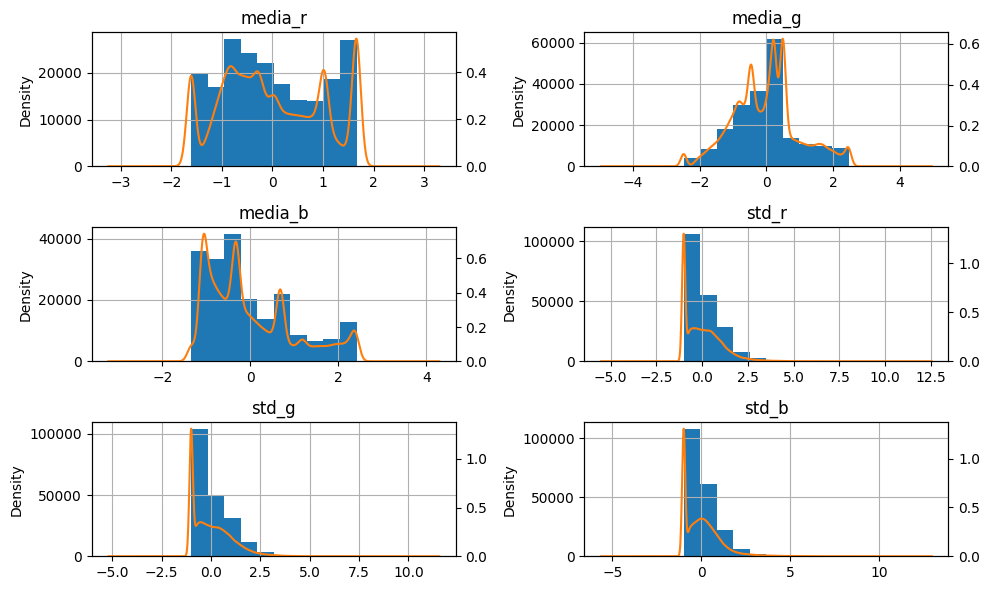

In [11]:
fig, axes = plt.subplots(3, 2, figsize=(10, 6))
for i, (name, col) in enumerate(X_subset.items()):
    r, c = i // 2, i % 2
    ax = axes[r, c]
    col.hist(ax=ax)
    ax2 = col.plot.kde(ax=ax, secondary_y=True, title=name)
    ax2.set_ylim(0)

fig.tight_layout()

### Correlaciones

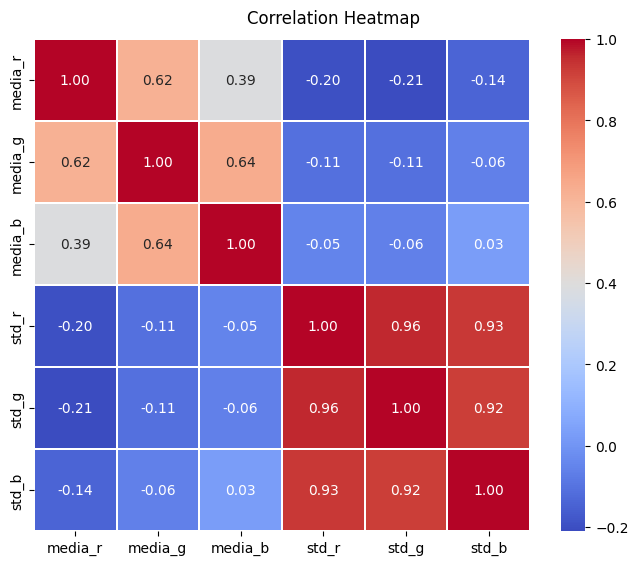

In [12]:
f, ax = plt.subplots(figsize=(8, 6))
corr = X_subset.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f', linewidths=.05)
f.subplots_adjust(top=0.93)
f.suptitle('Correlation Heatmap', fontsize=12)
plt.show()

In [13]:
data_sub = X_subset.copy()
data_sub['categoria'] = y_cat
data_sub

,media_r,media_g,media_b,std_r,std_g,std_b,categoria
0,0.278173,0.307410,0.106756,-0.335658,-0.562325,-0.445754,Arboles
1,-1.607237,0.224489,-0.327474,-1.009492,-1.000455,-0.986829,Arboles
2,-1.607237,0.224489,-0.327474,-1.009492,-1.000455,-0.986829,Arboles
3,-0.683418,-0.205690,-0.206964,0.736690,0.759151,1.085528,Arboles
4,-1.607237,0.224489,-0.327474,-1.009492,-1.000455,-0.986829,Arboles
...,...,...,...,...,...,...,...
202043,-0.527118,-0.406654,-0.764667,0.969887,0.952893,0.794373,Cuerpo de Agua
202044,-1.222232,-1.931838,-0.818852,-0.757450,-0.779835,-0.630352,Cuerpo de Agua
202045,-0.819565,-1.219667,-0.636760,1.139998,2.491216,0.630963,Cuerpo de Agua
202046,-0.360441,-0.605502,-0.136232,0.946120,1.178653,0.763325,Cuerpo de Agua


### Scatterplots

In [14]:

pp2 = sns.pairplot(data_sub, height=1.8, aspect=1.8, hue='categoria', plot_kws=dict(edgecolor="k", linewidth=0.5), diag_kind="kde", diag_kws=dict(fill=True))

fig = pp2.fig
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Pairwise Plots', fontsize=14)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

## Reducción de dimensión con PCA
Observa que usamos todas las variables

In [ ]:
from sklearn.decomposition import PCA

pca = PCA()
# ajustar en los datos (estandarizados)
pca.fit(X_std)

# muestra el porcentaje de varianza explicado por cada componente
dat = {'PC':range(1,6),'std':np.sqrt(pca.explained_variance_[:5]), 'var_prop':pca.explained_variance_ratio_[:5],
       'cum_prop':np.cumsum(pca.explained_variance_ratio_[:5])}
stds = pd.DataFrame(data = dat)
stds

,PC,std,var_prop,cum_prop
0,1,8.880135,0.610525,0.610525
1,2,4.632479,0.166147,0.776672
2,3,3.590187,0.099793,0.876464
3,4,1.844682,0.026346,0.902810
4,5,1.498318,0.017381,0.920191


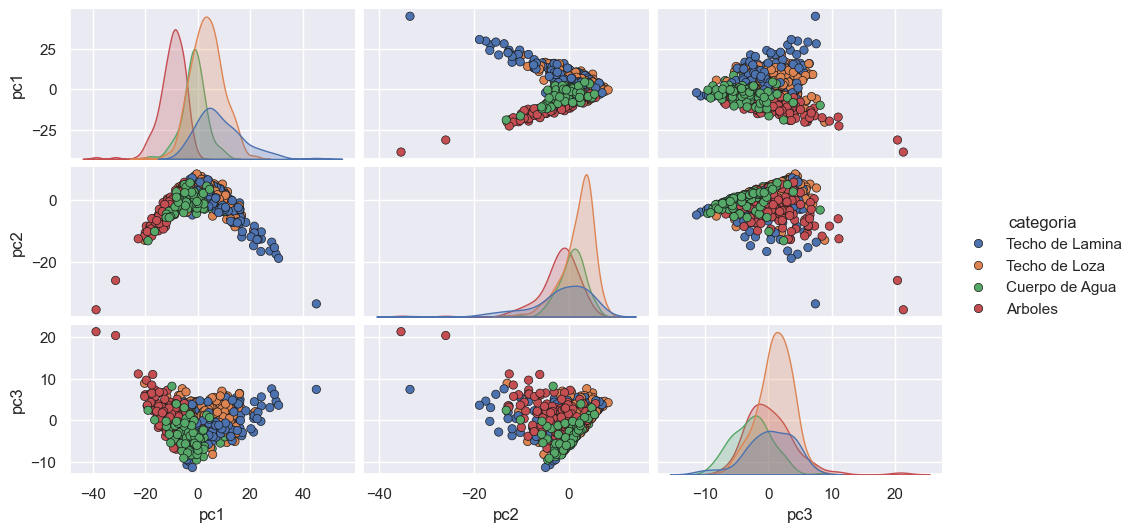

In [ ]:
proj = pca.transform(X_std)
pca_dataset = pd.DataFrame({'pc1': proj[:,0], 'pc2': proj[:,1], 'pc3': proj[:,2], 'categoria': y_cat})
sns.set()
sns.pairplot(pca_dataset, height=1.8, aspect=1.8, hue='categoria', plot_kws=dict(edgecolor="k", linewidth=0.5),
                   diag_kind="kde", diag_kws=dict(fill=True));

### Reducción de dimensión con PCA no-lineal (kernel PCA)

In [ ]:
from sklearn.decomposition import KernelPCA

# Kernel PCA con nuestros datos
kpca = KernelPCA(n_components=3, kernel='rbf', gamma=.2).fit(X_std)
# Proyecto los datos
proj = kpca.transform(X_std)


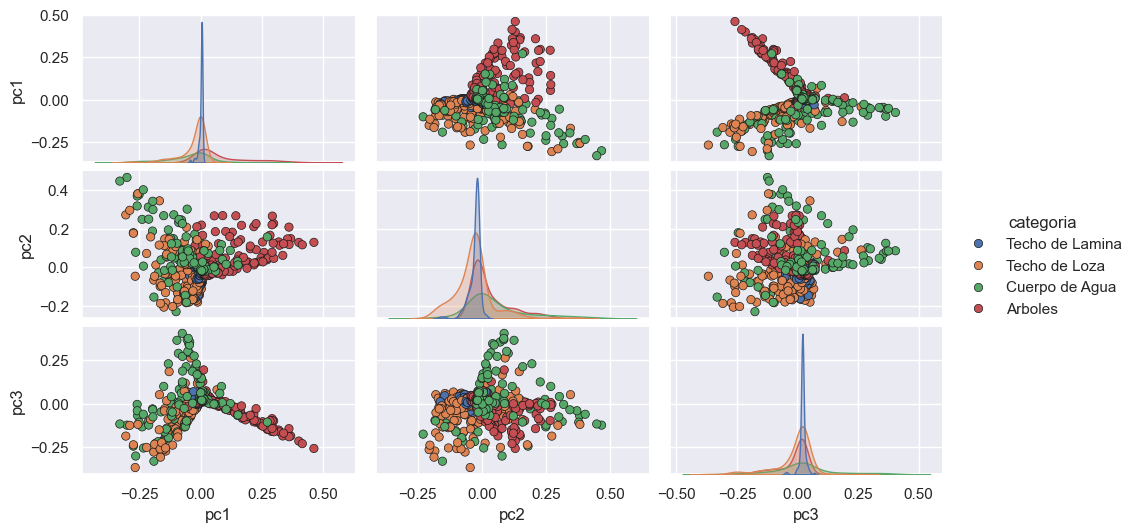

In [ ]:
kpca_dataset = pd.DataFrame({'pc1': proj[:,0], 'pc2': proj[:,1], 'pc3': proj[:,2], 'categoria': y_cat})
sns.set()
sns.pairplot(kpca_dataset, height=1.8, aspect=1.8, hue='categoria', plot_kws=dict(edgecolor="k", linewidth=0.5), diag_kind="kde", diag_kws=dict(fill=True));

### Un método más sofisticado de reducción de dimensión: [UMAP](https://umap-learn.readthedocs.io/en/latest/)

Instalarlo con `pip install umap-learn`

In [ ]:
import umap.umap_ as umap
import plotly.express as px

reducer = umap.UMAP(n_neighbors=5, n_components=2, min_dist=.1, metric='euclidean')
#embedding = reducer.fit_transform(amr_nmf)
embedding = reducer.fit_transform(X_std)

In [ ]:
umap_proj = pd.DataFrame({'x1': embedding[:,0], 'x2': embedding[:,1], 'categoria': y_cat, 'imagen': imagen})

fig = px.scatter(umap_proj, x='x1', y='x2', hover_data='imagen', color = 'categoria', title='UMAP plot')
fig.update_layout(autosize=False, width=700, height=700)
fig.show()

### Ejercicio: hacerlo con los datos sin estandarizar y comparar los resultados

## Modelos de clasificación

Pipeline
- estandarizacion
- ¿reduccion de dimension?
- clasificacion

In [16]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
import umap.umap_ as umap
from sklearn.decomposition import PCA

# obtenemos los datos...
# la ruta de la carpeta de los csv de las imágenes
dir_data = './imgs_csvs'
# el prefijo usado para el nombre de los archivos (incluyendo el _)
prefijo = 'Etiquetado_'
data, X, y, y_cat, label_encoder, imagen = get_data(dir_data, prefijo)
data

ModuleNotFoundError: No module named 'umap'

Datos de entrenamiento y prueba

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)

Definimos un pipeline de trabajo

- Pipelines: composición de *transformers* y *predictors*

![figure](https://miro.medium.com/v2/resize:fit:720/format:webp/1*e6U6j_FJirAbYYYTfEB-wQ.png)

[Fuente](https://medium.com/ai-made-simple/pipelines-in-scikit-learn-46c61c5c60b2)


### Pipeline con [KNN classifier](https://scikit-learn.org/stable/modules/neighbors.html#classification)

In [ ]:
pipe_steps = [('std', StandardScaler()), ('dim_red', PCA(n_components=5)), ("class-knn", KNeighborsClassifier(n_neighbors=10))]
#pipe_steps = [('std', StandardScaler()), ('dim_red', umap.UMAP(n_neighbors=5, min_dist=.1)), ("class-knn", KNeighborsClassifier(n_neighbors=10))]
pipe = Pipeline(steps=pipe_steps)
pipe.fit(X_train, y_train)

Pipeline(steps=[('std', StandardScaler()), ('dim_red', PCA(n_components=5)),
                ('class-knn', KNeighborsClassifier(n_neighbors=10))])

### Métricas de evaluación

![figure](https://miro.medium.com/v2/resize:fit:4800/format:webp/0*P7ZXAWS1QJl9k7h1) $F1 = \frac{2(\text{Precision}\times \text{Recall})}{\text{Precision}+ \text{Recall}}$

- **Accuracy** (exactitud) es simplemente la proporción de datos clasificados correctamente.

\begin{align*}
Accuracy = \frac{TP+TN}{TOTAL}
\end{align*}

donde $TP$ es el número de predicciones positivas correctamente clasificadas, $TN$ es el número de predicciones negativas correctamente clasificadas y $TOTAL$ es el número total de casos u observaciones.

Es la primera métrica que se comprueba al evaluar un clasificador; sin embargo, si los datos están desbalanceados o si se está más interesado detectar una de las clases, la exactitud no captura realmente la eficacia de un clasificador.

- **Precision** nos ayuda a cuantificar la fracción de positivos verdaderos entre el total de los clasificados como positivos. Refleja la habilidad de un clasificador para no arrojar falsos positivos.

\begin{align*}
Precision = \frac{TP}{TP+FP}
\end{align*}

donde $FP$ es el número de predicciones positivas calificadas
incorrectamente (falsos positivos).


- **Recall** (recuperación, recuerdo o sensitividad) mide la habilidad de un clasificador para detectar todas las muestras positivas.

\begin{align*}
Recall = \frac{TP}{TP+FN}
\end{align*}

donde $FN$ es el número de predicciones negativas calificadas
incorrectamente.

- **F1 score** es la media armónica de la precisión y la recuperación (Recall). Esta medida es una buena forma de resumir la evaluación en un número único.

\begin{align*}
F1 = 2\cdot \frac{precision \cdot recall}{precision + recall}
\end{align*}

Existe una relación entre la precisión y el recall: un modelo que predice todo como positivo tendrá un recall de 1, pero una precisión muy baja pues tendría muchos falsos positivos, mientras que un modelo que solo predijera un positivo y el resto negativos tendría un recall muy bajo, pero una precisión muy alta.

Es por ello que se recurre a la medida F1, ya que mitiga el impacto de las tasas altas y acentúa el de las tasas bajas.


**Ponderación para clasificación multiclase**

-  *macro*: esta es una media aritmética simple de todas las
métricas en las clases. Esta técnica otorga el mismo peso a todas
las clases, lo que la convierte en una buena opción para tareas de
clasificación con clases balanceadas.

- *weighted*: considera el desbalanceo de las categorías
calculando el promedio de métricas binarias ponderadas por el
número de muestras de cada clase en el objetivo. Si 3 scores de
precisión para 3 clases son: Clase 1 (0.85), clase 2 (0.80) y
clase 3 (0.89), el promedio ponderado se calculará multiplicando
cada puntuación por el número de datos de cada clase (soporte) y
dividiendo por el número total de muestras.

- *micro*: es lo mismo que Accuracy. El micro-promedio se
encuentra dividiendo la suma de la diagonal de la matriz de
confusión por la suma de todas las celdas, es decir, la exactitud
(accuracy). Como ésta métrica no es recomendable si se tienen
clases muy desbalanceadas, esta forma de promediar rara vez se
usa.
  

              precision    recall  f1-score   support

           0       0.79      0.98      0.88        59
           1       0.65      0.58      0.61        52
           4       0.76      0.53      0.62        36
           5       0.75      0.77      0.76        92

    accuracy                           0.74       239
   macro avg       0.74      0.71      0.72       239
weighted avg       0.74      0.74      0.74       239



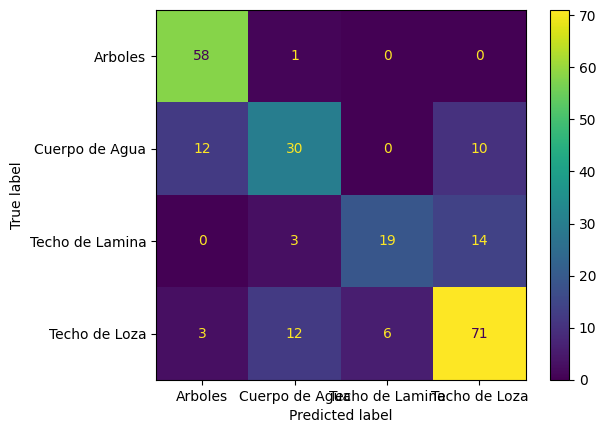

In [ ]:
y_pred = pipe.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

plt.style.use('default')
cm = metrics.confusion_matrix(y_test, y_pred)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=label_encoder.inverse_transform(pipe.classes_))
disp.plot();

In [ ]:
pipe_steps = [('std', StandardScaler()), ('dim_red', umap.UMAP(n_neighbors=5, min_dist=.1)), ("class-knn", KNeighborsClassifier(n_neighbors=10))]
pipe = Pipeline(steps=pipe_steps)
pipe.fit(X_train, y_train)

Pipeline(steps=[('std', StandardScaler()),
                ('dim_red',
                 UMAP(n_neighbors=5, tqdm_kwds={'bar_format': '{desc}: {percentage:3.0f}%| {bar} {n_fmt}/{total_fmt} [{elapsed}]', 'desc': 'Epochs completed', 'disable': True})),
                ('class-knn', KNeighborsClassifier(n_neighbors=10))])

              precision    recall  f1-score   support

           0       0.90      0.95      0.93        60
           1       0.56      0.60      0.58        45
           4       0.81      0.60      0.68        42
           5       0.71      0.75      0.73        92

    accuracy                           0.74       239
   macro avg       0.75      0.72      0.73       239
weighted avg       0.75      0.74      0.74       239



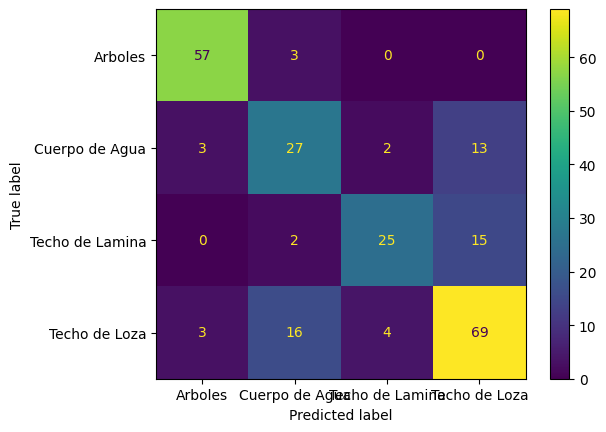

In [ ]:
y_pred = pipe.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

plt.style.use('default')
cm = metrics.confusion_matrix(y_test, y_pred)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=label_encoder.inverse_transform(pipe.classes_))
disp.plot();

### Pipeline con [Regresión logística](https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression)

In [ ]:
pipe_steps = [('std', StandardScaler()),  ('class-LR', LogisticRegression(solver='newton-cg'))]
pipe = Pipeline(steps=pipe_steps)
pipe.fit(X_train, y_train)

Pipeline(steps=[('std', StandardScaler()),
                ('class-LR', LogisticRegression(solver='newton-cg'))])

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        60
           1       0.93      0.91      0.92        45
           4       0.87      0.93      0.90        42
           5       0.94      0.92      0.93        92

    accuracy                           0.93       239
   macro avg       0.93      0.93      0.93       239
weighted avg       0.93      0.93      0.93       239



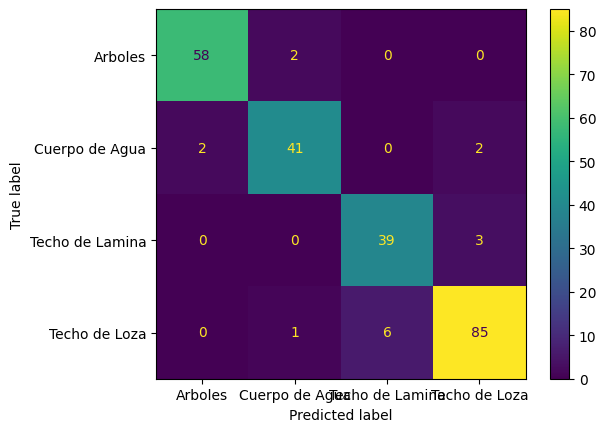

In [ ]:
y_pred = pipe.predict(X_test)
print(metrics.classification_report(y_test, y_pred))
plt.style.use('default')
cm = metrics.confusion_matrix(y_test, y_pred)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=label_encoder.inverse_transform(pipe.classes_))
disp.plot();

In [ ]:
pipe_steps = [('std', StandardScaler()), ('dim_red', PCA(n_components=5)), ('class-LR', LogisticRegression(solver='lbfgs'))]
pipe = Pipeline(steps=pipe_steps)
pipe.fit(X_train, y_train)

Pipeline(steps=[('std', StandardScaler()), ('dim_red', PCA(n_components=5)),
                ('class-LR', LogisticRegression())])

              precision    recall  f1-score   support

           0       0.85      0.93      0.89        60
           1       0.61      0.42      0.50        45
           4       0.74      0.55      0.63        42
           5       0.64      0.77      0.70        92

    accuracy                           0.71       239
   macro avg       0.71      0.67      0.68       239
weighted avg       0.71      0.71      0.70       239



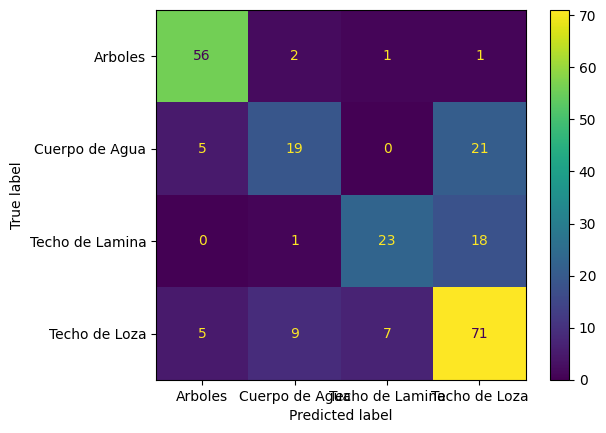

In [ ]:
y_pred = pipe.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

plt.style.use('default')
cm = metrics.confusion_matrix(y_test, y_pred)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=label_encoder.inverse_transform(pipe.classes_))
disp.plot();

### Pipeline con [SVM](https://scikit-learn.org/stable/modules/svm.html#svm-classification)

In [28]:
pipe_steps = [('std', StandardScaler()),  ('class-SVC', SVC(kernel='rbf', gamma=.01))]
pipe = Pipeline(steps=pipe_steps)
pipe.fit(X_train, y_train)

Pipeline(steps=[('std', StandardScaler()), ('class-SVC', SVC(gamma=0.01))])

              precision    recall  f1-score   support

           0       0.93      0.95      0.94        60
           1       0.63      0.53      0.58        45
           4       0.84      0.86      0.85        42
           5       0.75      0.79      0.77        92

    accuracy                           0.79       239
   macro avg       0.79      0.78      0.79       239
weighted avg       0.79      0.79      0.79       239



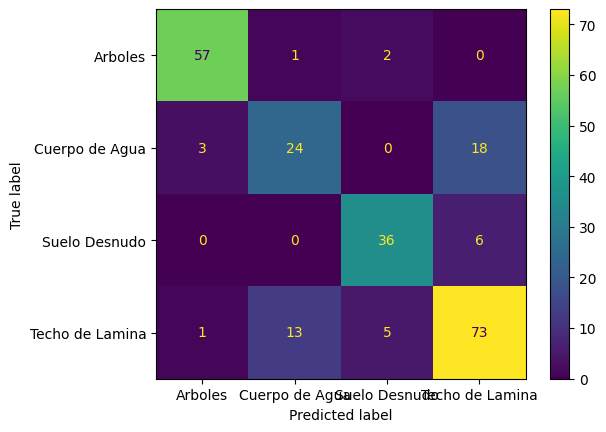

In [27]:
y_pred = pipe.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

plt.style.use('default')
cm = metrics.confusion_matrix(y_test, y_pred)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=label_encoder.inverse_transform(pipe.classes_))
disp.plot();

### Pipeline con [Random Forest](https://scikit-learn.org/stable/modules/ensemble.html#random-forests)

In [ ]:
pipe_steps = [('std', StandardScaler()),  ('class-RF', RandomForestClassifier(n_estimators=500, min_samples_split=2, oob_score=True, n_jobs=-1, class_weight='balanced', random_state=42))]
pipe = Pipeline(steps=pipe_steps)
pipe.fit(X_train, y_train)

Pipeline(steps=[('std', StandardScaler()),
                ('class-RF',
                 RandomForestClassifier(class_weight='balanced',
                                        n_estimators=500, n_jobs=-1,
                                        oob_score=True, random_state=42))])

              precision    recall  f1-score   support

           0       0.95      1.00      0.98        60
           1       0.77      0.60      0.68        45
           4       0.90      0.90      0.90        42
           5       0.81      0.87      0.84        92

    accuracy                           0.86       239
   macro avg       0.86      0.84      0.85       239
weighted avg       0.85      0.86      0.85       239



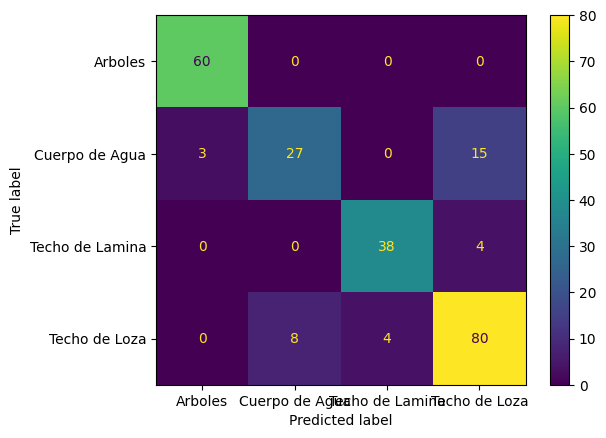

In [ ]:
y_pred = pipe.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

plt.style.use('default')
cm = metrics.confusion_matrix(y_test, y_pred)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=label_encoder.inverse_transform(pipe.classes_))
disp.plot();

### Pipeline con [Redes neuronales](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier)

In [ ]:
from sklearn.neural_network import MLPClassifier

# The ith element represents the number of neurons in the ith hidden layer.
hls = [10,10,5]
#hls = [5]
# regularización
a = 0.8

pipe_steps = [('std', StandardScaler()),  ('class-NN', MLPClassifier(solver='adam', hidden_layer_sizes=hls, random_state=0, alpha=a, max_iter=1000, activation = 'relu'))]
pipe = Pipeline(steps=pipe_steps)
pipe.fit(X_train, y_train)

Pipeline(steps=[('std', StandardScaler()),
                ('class-NN',
                 MLPClassifier(alpha=0.8, hidden_layer_sizes=[10, 10, 5],
                               max_iter=1000, random_state=0))])

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        59
           1       0.96      0.92      0.94        52
           4       0.87      0.94      0.91        36
           5       0.95      0.93      0.94        92

    accuracy                           0.95       239
   macro avg       0.94      0.95      0.94       239
weighted avg       0.95      0.95      0.95       239



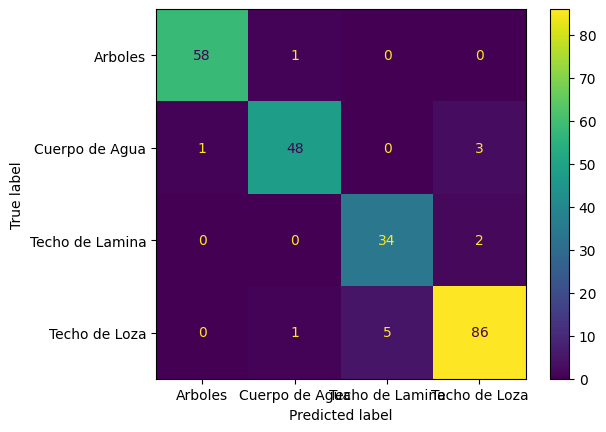

In [ ]:
y_pred = pipe.predict(X_test)
print(metrics.classification_report(y_test, y_pred))
plt.style.use('default')
cm = metrics.confusion_matrix(y_test, y_pred)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=label_encoder.inverse_transform(pipe.classes_))
disp.plot();

### Ejercicio: repetir la clasificación variando el pipeline para incluir/excluir la reducción de dimensión y compararlos. Incluir también la matriz de confusión.